# Определение перспективного тарифа для телеком компании

- Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

- Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018-й год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Изучение данных из файла

In [1]:
from scipy import stats as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [3]:
#посмотрю общую информацию о датафреймах
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.user_id.unique().shape

(492,)

In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
#проверю на дубликаты
calls.duplicated().sum()

0

In [7]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.user_id.unique().shape

(497,)

In [9]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [10]:
#проверю на дубликаты
internet.duplicated().sum()

0

In [11]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.user_id.unique().shape

(426,)

In [13]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [14]:
#проверю на дубликаты
messages.duplicated().sum()

0

In [15]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [16]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [17]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [18]:
users.user_id.unique().shape

(500,)

In [19]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
#проверю на дубликаты
users.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильно проверить на дубликаты, если мы это сделали и потом удалили код, то это не правильно.</font>

## Предобработка данных

In [21]:
#в датафрейме calls изменю тип данных даты, добавлю столбец month, округлю длительность звонка в большую сторону
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls['duration'] = np.ceil(calls['duration']).astype(int)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, добавили колонку с категорией месяца.</font><br>
<font color='DarkGreen'>👌 Правильно, что для округления используется np.ceil, так как он работает сразу со всем столбцом. 👍</font>

In [22]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.7+ MB


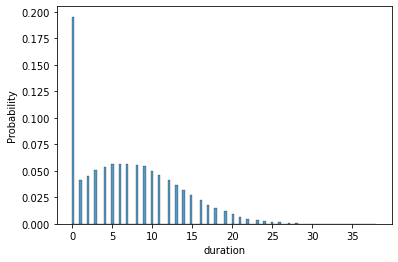

In [23]:
#проанализирую столбец duration на наличие аномалий
sns.histplot(calls['duration'], stat='probability');

Видим пик около нуля. Предположу, что нулями обозначены пропущенные звонки, поэтому оставлю их.

In [24]:
#в датафрейме internet изменю тип данных даты, добавлю столбец month
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


In [25]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


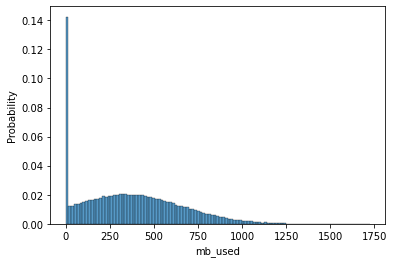

In [26]:
#проанализирую столбец mb_used на наличие аномалий
sns.histplot(internet['mb_used'], stat='probability');

Видим такой же пик около нуля. Предположу, что это неудачные попытки выйти в интернет. Тоже оставлю без изменений.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Таблица содержит идентификатор сессий и идентификатор пользователя. Значит пользователь устанавливал соединение и авторизовался. Но трафик нулевой. И это аномалия, возможно, что она связана с техничесткими проблемами оператора. Нам в данном проекте нулевые сессии не мешают, но в выводах исследования мы должны этот факт указать, так как это не полученная выручка оператора при существующем спросе на услугу пользователей.</font>

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Было бы правильно сделать анализ аномалий в датасете по интернет-трафику, лучше визуализировать гистограммой. Проанализировать их причину и принять решение по обработке.</font>

In [27]:
#в датафрейме messages изменю тип данных даты, добавлю столбец month
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


In [29]:
#в датафрейме users изменю тип данных даты
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [30]:
#сводная таблица для подсчета количества сделанных звонков и израсходованных минут разговора по месяцам для каждого пользователя
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum').reset_index()
calls_pivot.columns = ['user_id', 'month', 'duration']
calls_pivot.head()

,user_id,month,duration
0,1000,5,159
1,1000,6,172
2,1000,7,340
3,1000,8,408
4,1000,9,466


In [31]:
#сводная таблица для подсчета количества отправленных сообщений по месяцам для каждого пользователя
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
messages_pivot.columns = ['user_id', 'month', 'messages']
messages_pivot.head()

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [32]:
#сводная таблица для подсчета объема израсходованного интернет-трафика по месяцам для каждого пользователя
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
internet_pivot.columns = ['user_id', 'month', 'mb_used']
internet_pivot['mb_used'] = np.ceil((internet_pivot['mb_used'] / 1024)).astype('int')
internet_pivot = internet_pivot.rename(columns={'mb_used':'gb_used'})
internet_pivot.head()

,user_id,month,gb_used
0,1000,5,3
1,1000,6,23
2,1000,7,14
3,1000,8,14
4,1000,9,15


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 А мы не правильно перевели мегабайты в гигабайты. На надо с округлением вверх, а у нас вниз.  Лишаем оператора выручки.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, исправили. 😉</font>

In [33]:
#объединяю таблицы
df_new = calls_pivot.merge(messages_pivot, on=['user_id', 'month'], how='left')
df_new.head()

,user_id,month,duration,messages
0,1000,5,159,22.0
1,1000,6,172,60.0
2,1000,7,340,75.0
3,1000,8,408,81.0
4,1000,9,466,57.0


In [34]:
df_new = df_new.merge(internet_pivot, on=['user_id', 'month'], how='left')
df_new.head()

,user_id,month,duration,messages,gb_used
0,1000,5,159,22.0,3.0
1,1000,6,172,60.0,23.0
2,1000,7,340,75.0,14.0
3,1000,8,408,81.0,14.0
4,1000,9,466,57.0,15.0


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 Надо проанализировать куда у нас пропали пользователи после объединения таблиц, см. код ниже. Надо по ним принять правильное решение. </font>

</font><font color='Blue'><b>Комментарий студента</b></font><br>
Привет! У нас изначально в таблице calls 492 user_id. Могу предположить, что 8 абонентов вообще не пользовались данной услугой.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Наша задача подробно анализировать данные и стоило проверить при анализе датасетов, сколько клиентов используют каждую услугу. И мы бы еще на этом этапе обнаружили, что не все клиенты пользуются всеми тремя услугами. Тогда бы мы ранее обнаружили, что два клиента через 5 и 8 дней сбежали. Соответственно, в проекте мы должны отметить этот факт, так как эта информация будет полезна коммерческому департаменту для выяснения причин ухода клиентов. </font>

In [35]:
# Комментарий ревьюера 2
temp = users.copy()
temp[(temp.user_id ==  1128) | (temp.user_id ==  1371)]

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
128,1128,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra
371,1371,50,2018-12-30,Омск,Ириней,Трофимов,2018-12-25,smart


In [36]:
# Комментарий ревьюера
df_new.user_id.unique().shape 

(492,)

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 Таким образом при правильном объединении таблиц у нас должно остаться 498 пользователей или 500, но у двух будут NaNы в колонках услуг.</font>

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3174 non-null   int64  
 1   month     3174 non-null   int64  
 2   duration  3174 non-null   int64  
 3   messages  2678 non-null   float64
 4   gb_used   3163 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 148.8 KB


In [38]:
#заполню пропуски нулями
df_new = df_new.fillna(0)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3174 entries, 0 to 3173
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   3174 non-null   int64  
 1   month     3174 non-null   int64  
 2   duration  3174 non-null   int64  
 3   messages  3174 non-null   float64
 4   gb_used   3174 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 148.8 KB


<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что заполнили пропуски нулями. 👍</font>

In [39]:
#удалю ненужные столбцы из таблицы users
users = users.drop(['age', 'churn_date', 'first_name', 'last_name', 'reg_date'], axis=1)
users.set_index('user_id', inplace=True)
users.head()

,city,tariff
user_id,,
1000,Краснодар,ultra
1001,Москва,smart
1002,Стерлитамак,smart
1003,Москва,ultra
1004,Новокузнецк,ultra


In [40]:
#объединю полученную таблицу с таблицей users
df_new = df_new.merge(users, on='user_id', how='outer')
df_new.head()

,user_id,month,duration,messages,gb_used,city,tariff
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra


In [41]:
df_new.user_id.unique().shape

(500,)

In [42]:
#в tariffs переименую столбец tariff_name на tariff
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [43]:
#объединяю в таблицей tariffs
for df in [tariffs]:
    df_new = df_new.merge(df, on = ['tariff'], how = 'left')
df_new.head()

,user_id,month,duration,messages,gb_used,city,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1000,30720,3000,1950,150,1,1


In [44]:
df_new.user_id.unique().shape

(500,)

In [45]:
#переведу Мб в Гб и округлю в большую сторону, а также переименую столбец
df_new['mb_per_month_included'] = np.ceil(df_new['mb_per_month_included'] / 1024).astype(int)
df_new = df_new.rename(columns={'mb_per_month_included':'gb_per_month_included'})
df_new.head()

,user_id,month,duration,messages,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1000,30,3000,1950,150,1,1


In [46]:
#функция для подсчета помесячной выручки с каждого пользователя
def revenue(row):
    
    duration = row['duration']
    messages = row['messages']
    gb_used = row['gb_used']
    minutes_included = row['minutes_included']
    messages_included = row['messages_included']
    gb_per_month_included = row['gb_per_month_included']
    rub_per_minute = row['rub_per_minute']
    rub_per_message = row['rub_per_message']
    rub_per_gb = row['rub_per_gb']
    rub_monthly_fee = row['rub_monthly_fee']
    tariff = row['tariff']
    
    if tariff == 'smart':
        extra_duration = duration - minutes_included
        extra_messages = messages - messages_included
        extra_gb = gb_used - gb_per_month_included
        
        if extra_duration < 0:
            extra_duration = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_gb < 0:
            extra_gb = 0
            
        return (
            extra_duration * rub_per_minute
        ) + (
            extra_messages * rub_per_message
        ) + (
            
            extra_gb * rub_per_gb) + rub_monthly_fee
    
    else:
        extra_duration = duration - minutes_included
        extra_messages = messages - messages_included
        extra_gb = gb_used - gb_per_month_included
        
        if extra_duration < 0:
            extra_duration = 0
        if extra_messages < 0:
            extra_messages = 0
        if extra_gb < 0:
            extra_gb = 0
            
        return (
            extra_duration * rub_per_minute
        ) + (
            extra_messages * rub_per_message
        ) + (
            
            extra_gb * rub_per_gb) + rub_monthly_fee

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо! Прописали расчет выручки.</font>

In [47]:
#добавлю новый столбец с помесячной выручкой
df_new['revenue'] = df_new.apply(revenue, axis=1)
df_new.head()

,user_id,month,duration,messages,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,5.0,159.0,22.0,3.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
1,1000,6.0,172.0,60.0,23.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
2,1000,7.0,340.0,75.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
3,1000,8.0,408.0,81.0,14.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0
4,1000,9.0,466.0,57.0,15.0,Краснодар,ultra,1000,30,3000,1950,150,1,1,1950.0


In [48]:
df_new.user_id.unique().shape

(500,)

</font><font color='Blue'><b>Комментарий студента</b></font><br>
В итоговой таблице все пользователи на месте.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А вот этих можно удалить.</font>

In [66]:
# Комментарий ревьюера 2
temp = df_new.copy()
temp[(temp.user_id ==  1128) | (temp.user_id ==  1371)]

,user_id,month,duration,messages,gb_used,city,tariff,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
3176,1128,NaN,NaN,NaN,NaN,Волжский,ultra,1000,30,3000,1950,150,1,1,NaN
3179,1371,NaN,NaN,NaN,NaN,Омск,smart,50,15,500,550,200,3,3,NaN


## Анализ данных

In [49]:
#Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
df_new_smart = df_new.query('tariff == "smart"').pivot_table(index='user_id', values=['duration', 'gb_used', 'messages', 'revenue'], aggfunc='median')
df_new_smart.head()

,duration,gb_used,messages,revenue
user_id,,,,
1001,422.0,16.0,0.0,850.0
1002,214.0,18.0,11.0,1150.0
1005,593.5,8.0,49.0,836.5
1006,356.0,16.0,0.0,750.0
1007,480.0,15.0,26.0,981.0


In [50]:
df_new_smart.describe()

,duration,gb_used,messages,revenue
count,349.000000,349.000000,349.000000,349.000000
mean,438.724928,16.926934,33.806590,1304.697708
std,158.761565,4.076279,28.042491,722.629582
min,13.000000,6.000000,0.000000,550.000000
25%,324.500000,14.000000,11.000000,750.000000
50%,440.000000,17.000000,28.500000,1150.000000
75%,541.000000,19.500000,51.000000,1667.000000
max,891.500000,36.000000,134.000000,5680.000000


In [51]:
#Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц
df_new_ultra = df_new.query('tariff == "ultra"').pivot_table(index='user_id', values=['duration', 'gb_used', 'messages', 'revenue'], aggfunc='median')
df_new_ultra.head()

,duration,gb_used,messages,revenue
user_id,,,,
1000,339.0,14.5,65.0,1950.0
1003,824.0,12.0,83.0,1950.0
1004,132.5,18.0,154.5,1950.0
1013,468.0,15.5,21.0,1950.0
1016,61.0,13.5,71.0,1950.0


In [52]:
df_new_ultra.describe()

,duration,gb_used,messages,revenue
count,143.000000,143.000000,143.000000,143.000000
mean,577.164336,20.244755,57.094406,2059.615385
std,290.153182,8.709285,48.496913,298.513381
min,6.000000,0.000000,0.000000,1950.000000
25%,350.500000,14.750000,16.750000,1950.000000
50%,546.000000,20.000000,49.500000,1950.000000
75%,791.500000,27.000000,87.000000,1950.000000
max,1273.000000,39.000000,197.000000,3300.000000


In [53]:
#посчитаю среднее количество, дисперсию и стандартное отклонение
df_new_np = df_new.pivot_table(index=['tariff'], values=['duration', 'gb_used', 'messages', 'revenue'], 
                    aggfunc={'duration': [np.median, np.var, np.std], 
                             'gb_used': [np.median, np.var, np.std], 
                             'messages': [np.median, np.var, np.std],
                            'revenue': [np.median, np.var, np.std]})
df_new_np

duration                           gb_used                       \
         median         std           var  median       std        var   
tariff                                                                   
smart     423.0  189.325618  35844.189551    17.0  5.752599  33.092396   
ultra     528.0  306.925754  94203.418396    19.0  9.890432  97.820643   

       messages                         revenue                             
         median        std          var  median         std            var  
tariff                                                                      
smart      28.0  28.259437   798.595792  1030.0  819.119853  670957.332878  
ultra      39.0  46.890656  2198.733603  1950.0  379.423372  143962.095301

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, посчитали статистику по тарифам. 👍</font>

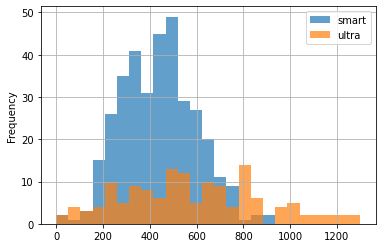

In [54]:
#построю гистограммы и посмотрю, как ведут себя пользователи разных тарифов
ax = df_new_smart.plot(
    kind='hist',
    y='duration',
    range=(0, 1300),
    bins=25,
    alpha=0.7,
    label='smart',
)
df_new_ultra.plot(
    kind='hist',
    y='duration',
    range=(0, 1300),
    bins=25,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
);

- Лимит на звонки в тарифе Смарт состовляет 500 минут.
- В среднем абоненты тратят 300-500 минут в месяц.
- Но также есть немалая часть, которая превышает лимит.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 При проведении сравнительного анализа лучше на графики выводить данные обоих тарифов в одной координатной сетке с указанием меток тарифов. Сделаем?</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Молодец, правильное решение. 👍</font>

- В тарифе Ультра лимит на звонки - 3000 минут.
- В среднем абоненты расходуют 200-800 минут.
- Превышений нет.

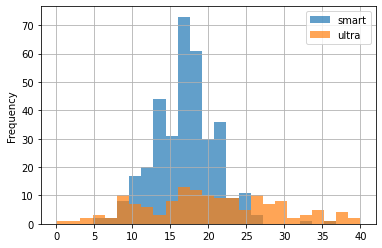

In [55]:
ax = df_new_smart.plot(
    kind='hist',
    y='gb_used',
    range=(0, 40),
    bins=25,
    alpha=0.7,
    label='smart',
)
df_new_ultra.plot(
    kind='hist',
    y='gb_used',
    range=(0, 40),
    bins=25,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
);

- Лимт на объем интернет-трафика состовляет 15 Гб в тарифе Смарт.
- Большинству абонентов явно не хватает лимита.

- В тарифе Ультра лимит на объем интернет-трафика состовляет 30 Гб.
- В среднем абоненты тратят 15-30 Гб в месяц.
- Лишь малая часть немного превышает лимит.

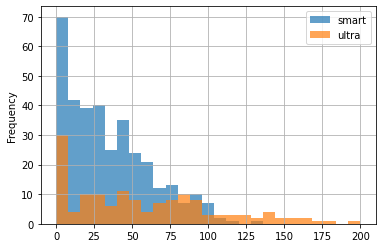

In [56]:
ax = df_new_smart.plot(
    kind='hist',
    y='messages',
    range=(0, 200),
    bins=25,
    alpha=0.7,
    label='smart',
)
df_new_ultra.plot(
    kind='hist',
    y='messages',
    range=(0, 200),
    bins=25,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
);

- В тарифе Смарт лимит на сообщения - 50 штук.
- Большая часть абонентов либо совсем не пользуется этой услугой, либо отправляет очень мало сообщений.
- Часть абонентов превышают лимит.

- В тарифе Ультра лимит сообщений составляет 1000 штук.
- Также большая часть абонентов либо не пользуется услугой, либо пользуется совсем мало.
- Превышений по лимиту нет.

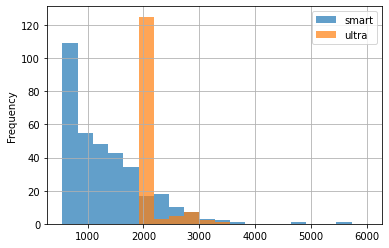

In [57]:
#построю гистограммы по средней выручке от абонентов
ax = df_new_smart.plot(
    kind='hist',
    y='revenue',
    range=(550, 6000),
    bins=20,
    alpha=0.7,
    label='smart',
)
df_new_ultra.plot(
    kind='hist',
    y='revenue',
    range=(550, 6000),
    bins=20,
    alpha=0.7,
    label='ultra',
    ax=ax,
    grid=True,
    legend=True,
);

- Абоненты тарифа Смарт часто переплачивают за превышение лимитов.
- В тарифе Ультра абонентам хватает лимитов. Лишь малая часть переплачивает.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkMagenta'>👉 Как инструкция на выполнение проекта, так и технические задания на проведение исследования не всегда содержат всю информацию, что необходимо сделать. Но указывается задача исследования, у нас это: "коммерческий департамент хочет понять, какой тариф приносит больше денег". Но мы ограничиваемся в анализе только количеством сообщений, длительностью звонков и интернет-трафиком. При этом у нас уже посчитано сколько пользователи платят за эти услуги, но сам анализ выручки в разрезе тарифа мы не делаем. Тогда, как мы получим ответ на вопрос какой тариф выгоднее?</font><br>
<font color='Red'>🛠 Надо сделать то же самое, но по выручке в разрезе тарифов. Хорошо?</font>

## Проверка гипотез

𝐻0  — средняя выручка пользователей тарифа «Ультра» равна средней выручке пользователей тарифа «Смарт».

𝐻1 — средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

𝛼=5%

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, правильно сформулированы гипотезы.</font>

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkMagenta'>👉 А `nan` в `results.pvalue` мы получаем, потому, что у нас в таблице остались пропуски.</font>
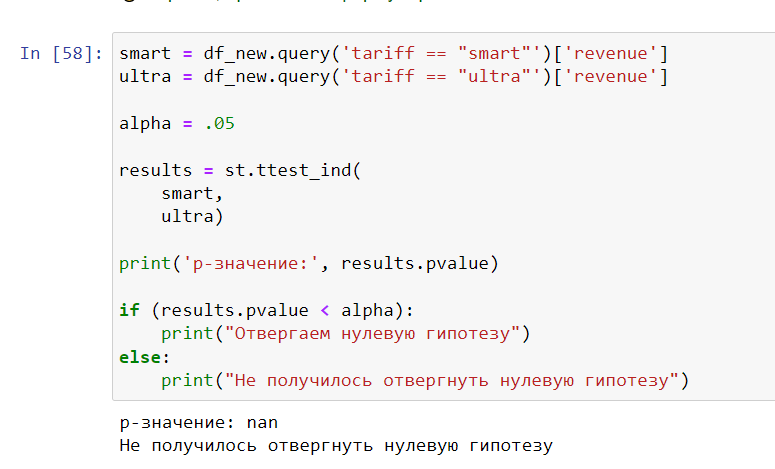

In [67]:
# Комментарий ревьюера 2
#smart = df_new.query('tariff == "smart"')['revenue']
#ultra = df_new.query('tariff == "ultra"')['revenue']

smart = df_new.query('tariff == "smart"')['revenue'].dropna()
ultra = df_new.query('tariff == "ultra"')['revenue'].dropna()

alpha = .05

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1830308249112928e-155
Отвергаем нулевую гипотезу


In [59]:
df_new.pivot_table(index='tariff', values='revenue', aggfunc='mean')

,revenue
tariff,
smart,1290.891138
ultra,2070.977918


Действительно, средняя выручка по тарифу Ультра почти в 2 раза больше средней выручки по тарифу Смарт.

𝐻0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

𝐻1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

𝛼=5%

In [60]:
moscow_tariff = df_new[(df_new['city'] == 'Москва')]
other_tariff = df_new[(df_new['city'] != 'Москва')]

In [68]:
# Комментарий ревьюера 2
#moscow = moscow_tariff['revenue']
#regions = other_tariff['revenue']

moscow = moscow_tariff['revenue'].dropna()
regions = other_tariff['revenue'].dropna()

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.4619932225305272
Не получилось отвергнуть нулевую гипотезу


In [62]:
moscow.mean()

1546.0524590163934

In [63]:
regions.mean()

1519.5237909516381

Здесь мы видим, что средняя выручка по Москве слабо отличается от выручки по регионам.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, что дополнительно показаны средние выручки, как иллюстрация не противоречивости нашей проверки гипотез. 👍</font>

In [64]:
#сводная таблица, которая показывает среднюю выручку по месяцам для каждого тарифа
df_new_pivot = df_new.pivot_table(index='month', columns=['tariff'], values='revenue')
df_new_pivot.columns = ['smart', 'ultra']
df_new_pivot.head(12)

,smart,ultra
month,,
1.0,721.323529,1950.000000
2.0,827.603448,1975.000000
3.0,1164.623377,2014.864865
4.0,963.089286,2003.773585
5.0,1197.510638,2064.843750
6.0,1208.030675,2042.592593
7.0,1223.950249,2123.863636
8.0,1323.888889,2085.436893
9.0,1251.104247,2022.972973


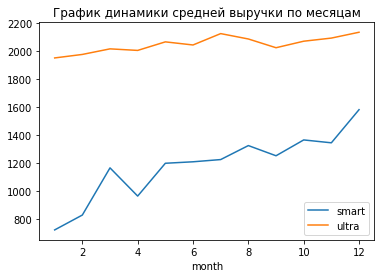

In [65]:
#построю график и посмотрю на динамику выручки по месяцам
df_new_pivot.plot(title='График динамики средней выручки по месяцам');

- Средняя выручка от пользователей тарифа Смарт с каждым месяцем растет.
- Средняя выручка от пользователей тарифа Ультра тоже растет, но гораздо медленнее.

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Что теперь получается. Мы провели исследование в соответствии с заданием, но мы показали динамику выручки. Мы обнаружили, что в течение года выручка по тарифу Смарт растет быстрее Ультра. И это надо отразить в выводах исследования. <br>Реклама это все-таки вложение в будущее, то есть отдача от нее не будет мгновенной. Тогда может рекламой стимулировать растущий тариф? <br>На основе нашего исследования может быть принято обоснованное решение по рекламе тарифа, это повышает ценность нашей работы и наш авторитет, как профессионала. И это повод и зарплату поднять. 😄</font>

## Общий вывод

Проанализировав данные, можно сделать вывод:
- абонентам тарифа Смарт часто не хватает услуг в рамках тарифного пакета, и они чаще переплачивают за превышение лимита;
- абоненты тарифа Ультра, напротив, часто не используют тарифный пакет в полном объеме;
- проверка первой гипотезы показала, что выручки от разных тарифов отличаются;
- на графике динамики средней выручки видно как с каждым месяцем выручка от пользователей тарифа Смарт растет, и за 12 месяцев выросла в 2 раза;
- тогда как выручка от пользователей тарифа Ультра тоже имеет тенденцию к росту, но очень медленно;
- при проверке второй гипотезы не было выявлено различий в выручке от пользователей из Москвы и из регионов;
- посчитав среднюю выручку по Москве и по регионам мы увидели минимальное различие в выручке.

Не смотря на все вышесказанное, тариф Ультра приносит больше денег компании Мегалайн.

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Очень уж короткое обобщение всего исследования.</font><br>
<font color='DarkMagenta'>👉 И явно не хватает графика динамики выручки по месяцам в разрезе тарифов. Есть ли там тренды, выручка по какому-то тарифу растет или падает? Сделаем?</font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера</b></font><br><br>
<font color='DarkGreen'>👌 Ольга, проект очень хорошо и детально проработан. И дальше так держать!<br></font>
<font color='Red'>🛠 А что бы еще лучше сделать проект нам надо:</font><br>
<font color='Red'>🛠 Исправить округление интернет-сессий до целого. Проанализировать пропажу пользователей после объединения таблиц. Необходимо провести анализ выручки в разрезе тарифов. <br></font>
<font color='DarkMagenta'>👉 При исправлении ошибок и недочетов мы приобретем дополнительный опыт и навыки!</font><br>
<font color='DarkGreen'>👌 Жду окончательный вариант! Удачи. </font>

<font color='DarkBlue'><b>Заключительный комментарий ревьюера 2</b></font><br><br>
<font color='DarkGreen'>👌 Ольга, нам удалось улучшить проект. Но как-то мы не аккуратно работаем. Исправляем одни ошибки и пропускаем другие.<br>А следующий проект будет очень сложным, там много подводных камней и не все очевидное является правильным. Но все равно, мы молодцы! 👍<br></font>
<font color='DarkGreen'>👌 А теперь нас ждут новые знания в новом проекте! Удачи! 😉</font>
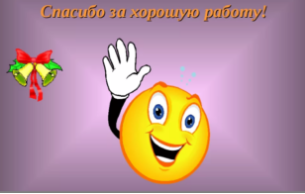